# JensenRit_et_al_1995

code source: https://brian2.readthedocs.io/en/stable/examples/frompapers.Jansen_Rit_1995_single_column.html

paper: https://link.springer.com/content/pdf/10.1007/BF00199471.pdf

In [1]:
from numpy import *
from numpy import random as rnd
from matplotlib.pyplot import *
from brian2 import *

def JensenRit1995(integrator):

    defaultclock.dt = .1*ms   #default time step

    te,ti    = 10.*ms, 20.*ms #taus for excitatory and inhibitory populations
    e0       = 5.             #max firing rate
    v0       = 6.             #(max FR)/2 input
    r0       = 0.56           #gain rate
    A,B,C    = 3.25, 22., 135 #standard parameters as in the set (7) of the original paper
    P,deltaP = 120, 320.-120  #random input uniformly distributed between 120 and
                              #320 pulses per second

    # Random noise
    nstim = TimedArray(rnd.rand(70000),2*ms)

    # Equations as in the system (6) of the original paper
    equs = """
    dy0/dt = y3                             /second : 1
    dy3/dt = (A        * Sp -2*y3 -y0/te*second)/te : 1
    dy1/dt = y4                             /second : 1
    dy4/dt = (A*(p+ C2 * Se)-2*y4 -y1/te*second)/te : 1
    dy2/dt = y5                             /second : 1
    dy5/dt = (B   * C4 * Si -2*y5 -y2/ti*second)/ti : 1
    p  = P0+nstim(t)*dlP                   : 1
    Sp = e0/(1+exp(r0*(v0 - (y1-y2)    ))) : 1
    Se = e0/(1+exp(r0*(v0 -  C1*y0     ))) : 1
    Si = e0/(1+exp(r0*(v0 -  C3*y0     ))) : 1
    C1            : 1
    C2 = 0.8 *C1  : 1
    C3 = 0.25*C1  : 1
    C4 = 0.25*C1  : 1
    P0            : 1
    dlP           : 1
    """

    n = NeuronGroup(6,equs,method='euler') #creates 6 JR models for different connectivity parameters

    #set parameters as for different traces on figure 3 of the original paper
    n.C1[0]  = 68
    n.C1[1]  = 128
    n.C1[2]  = C
    n.C1[3]  = 270
    n.C1[4]  = 675
    n.C1[5]  = 1350
    #set stimulus offset and noise magnitude
    n.P0     = P
    n.dlP    = deltaP

    #just record everything
    sm = StateMonitor(n,['y4','y1','y3','y0','y5','y2'],record=True)

    #Runs for 5 second
    run(5*second,report='text')


    #This code goes over all models with different parameters and plot activity of each population.

    figure(1,figsize=(22,16))
    idx1 = where(sm.t/second>2.)[0]

    o = 0
    for p in [0,1,2,3,4,5]:
        if o == 0: ax = subplot(6,3,1)
        else     :subplot(6,3,1+o,sharex=ax)
        if o == 0: title("E")
        plot(sm.t[idx1]/second, sm[p].y1[idx1],'g-')
        ylabel(f"C={n[p].C1[0]}")
        if o == 15: xlabel("Time (seconds)")
        subplot(6,3,2+o,sharex=ax)
        if o == 0: title("P")
        plot(sm.t[idx1]/second, sm[p].y0[idx1],'b-')
        if o == 15: xlabel("Time (seconds)")
        subplot(6,3,3+o,sharex=ax)
        if o == 0: title("I")
        plot(sm.t[idx1]/second, sm[p].y2[idx1],'r-')
        if o == 15: xlabel("Time (seconds)")
        o += 3

    show()

    

exact


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 5s


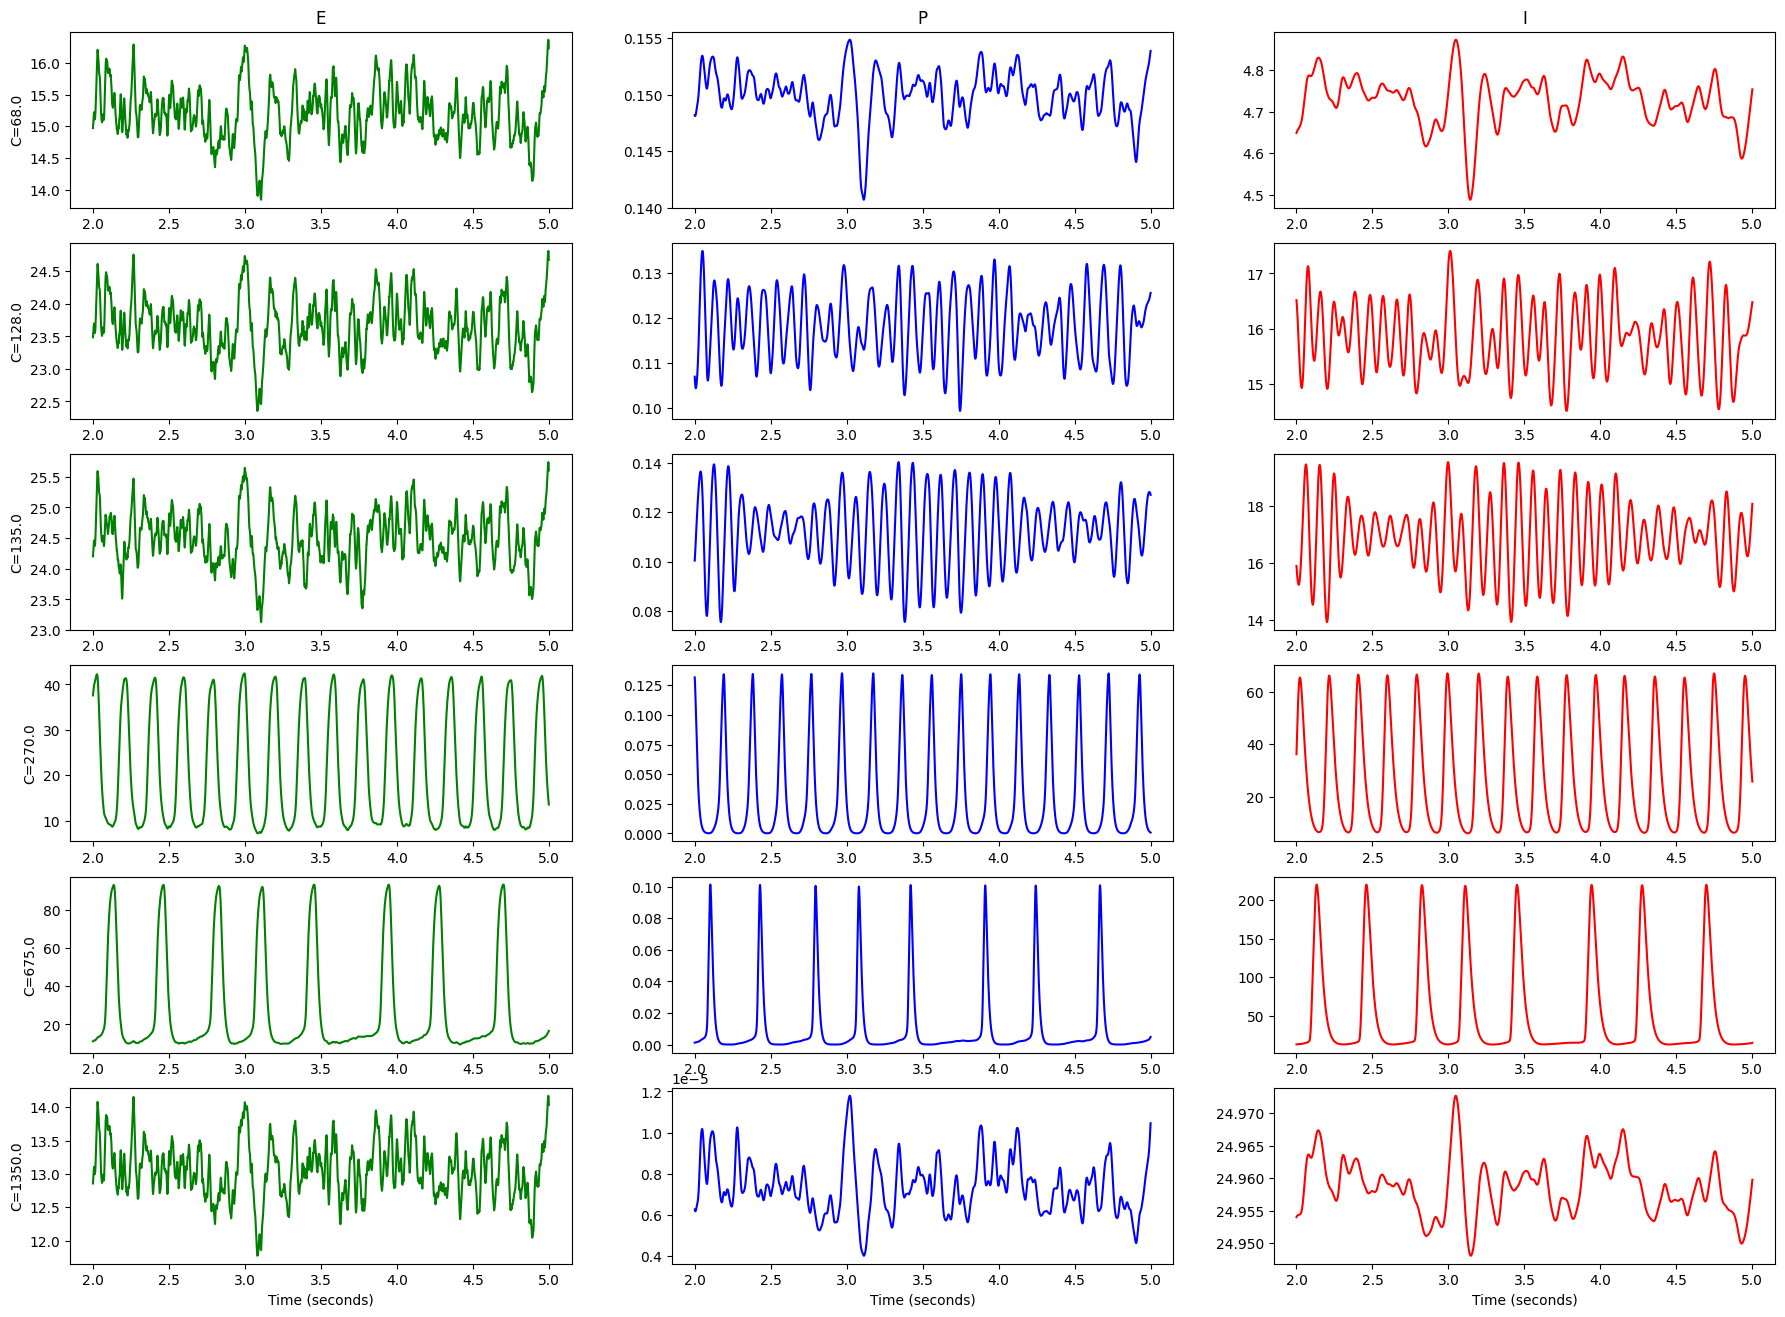

exponential_euler
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 9s


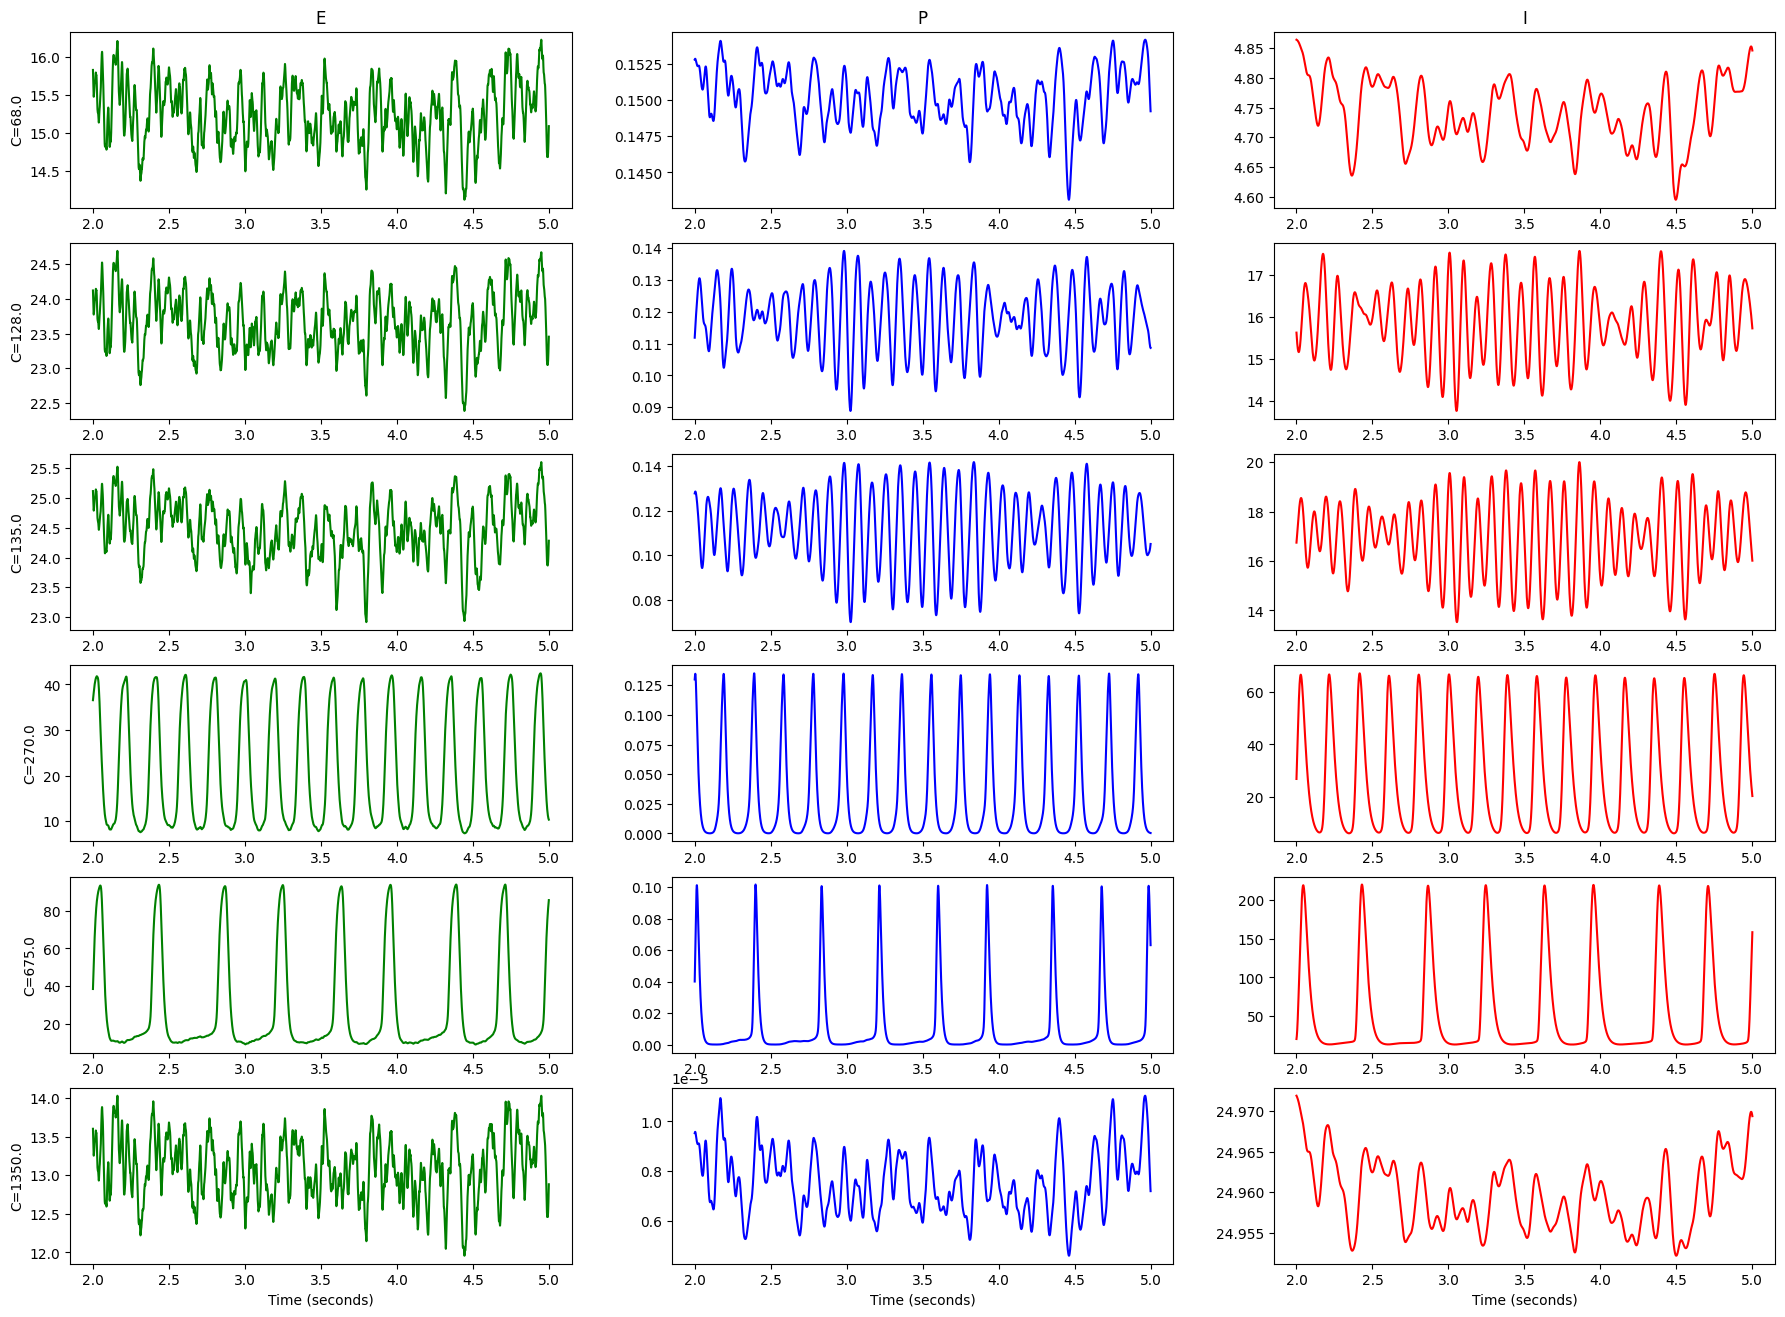

euler
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 8s


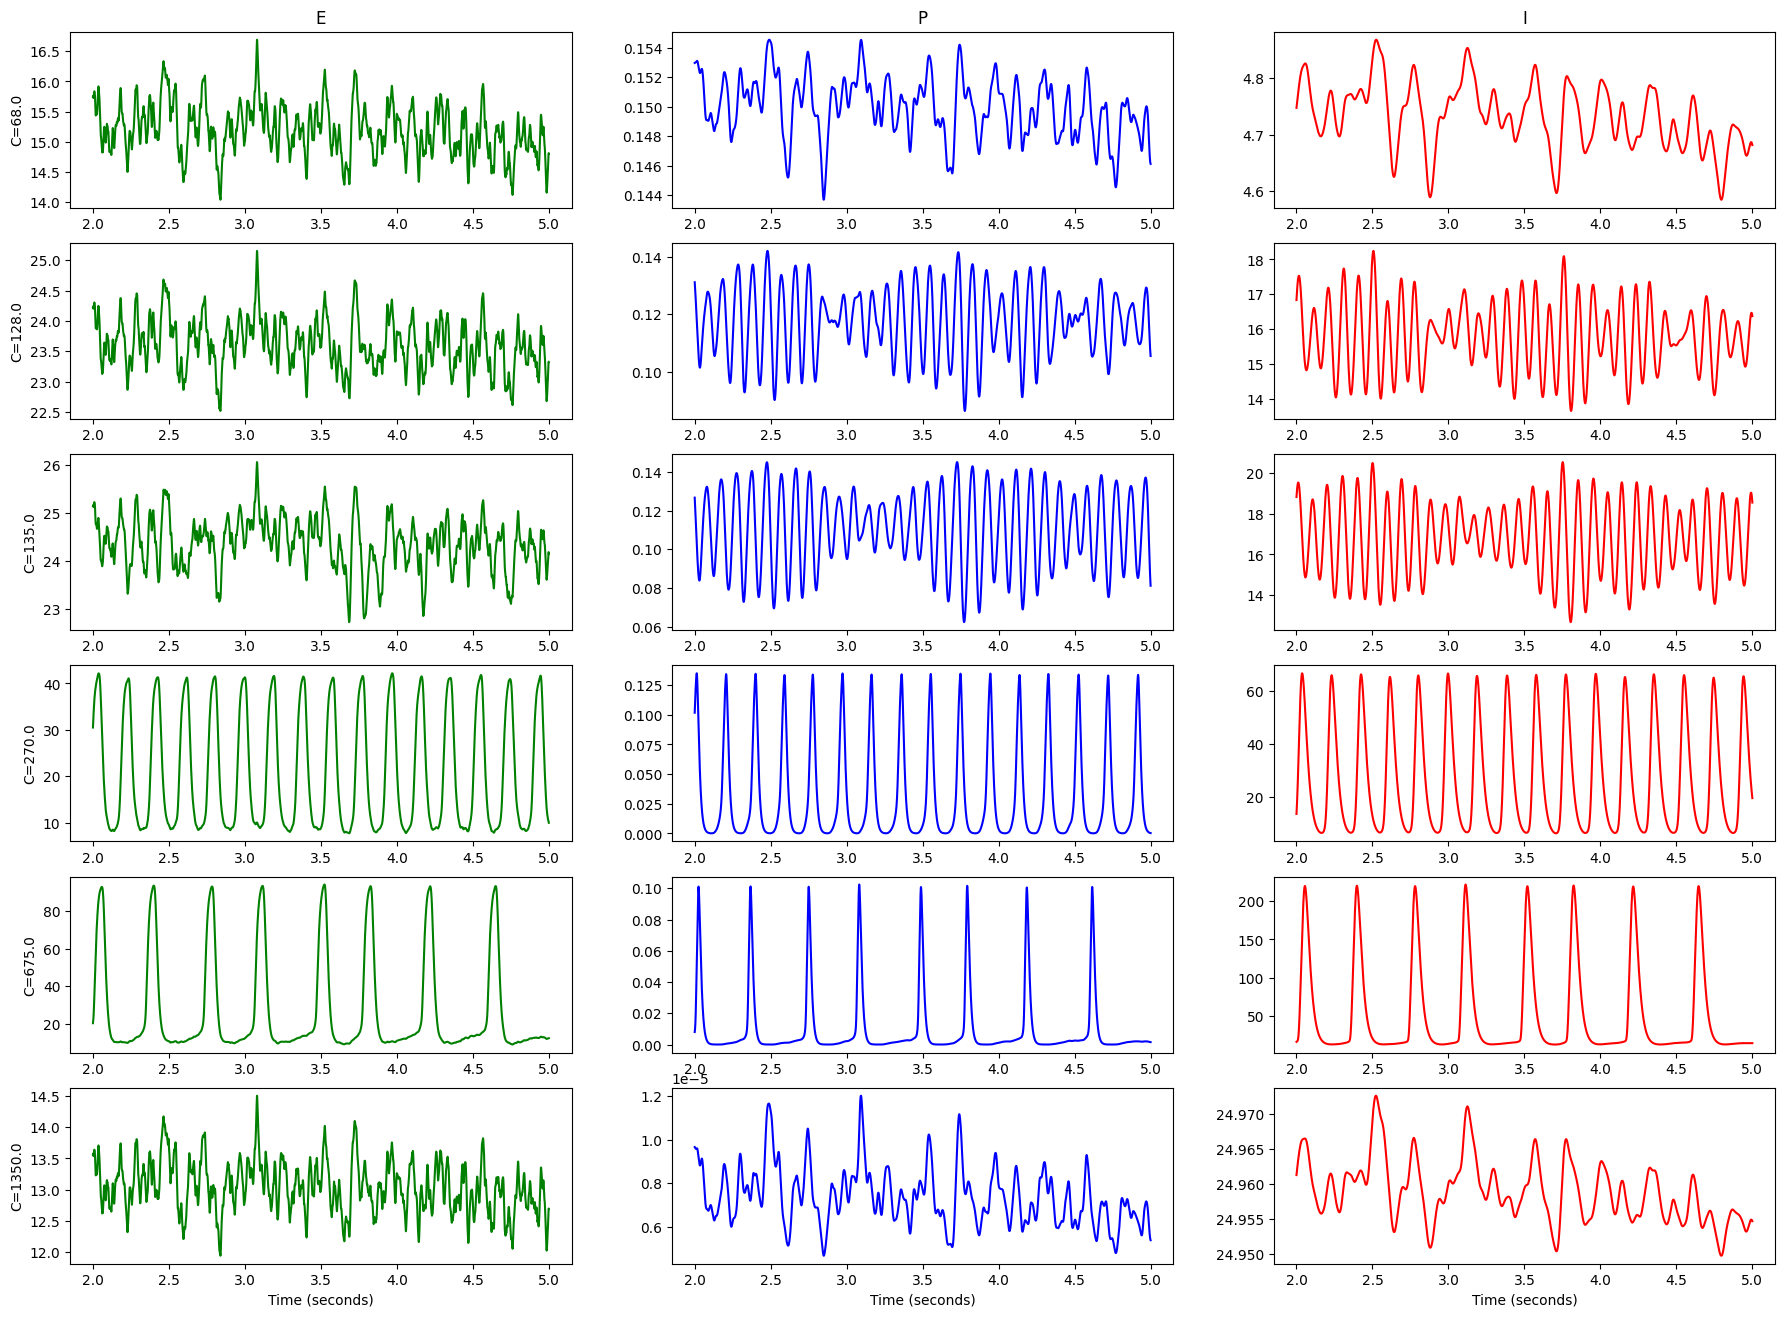

rk2
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 8s


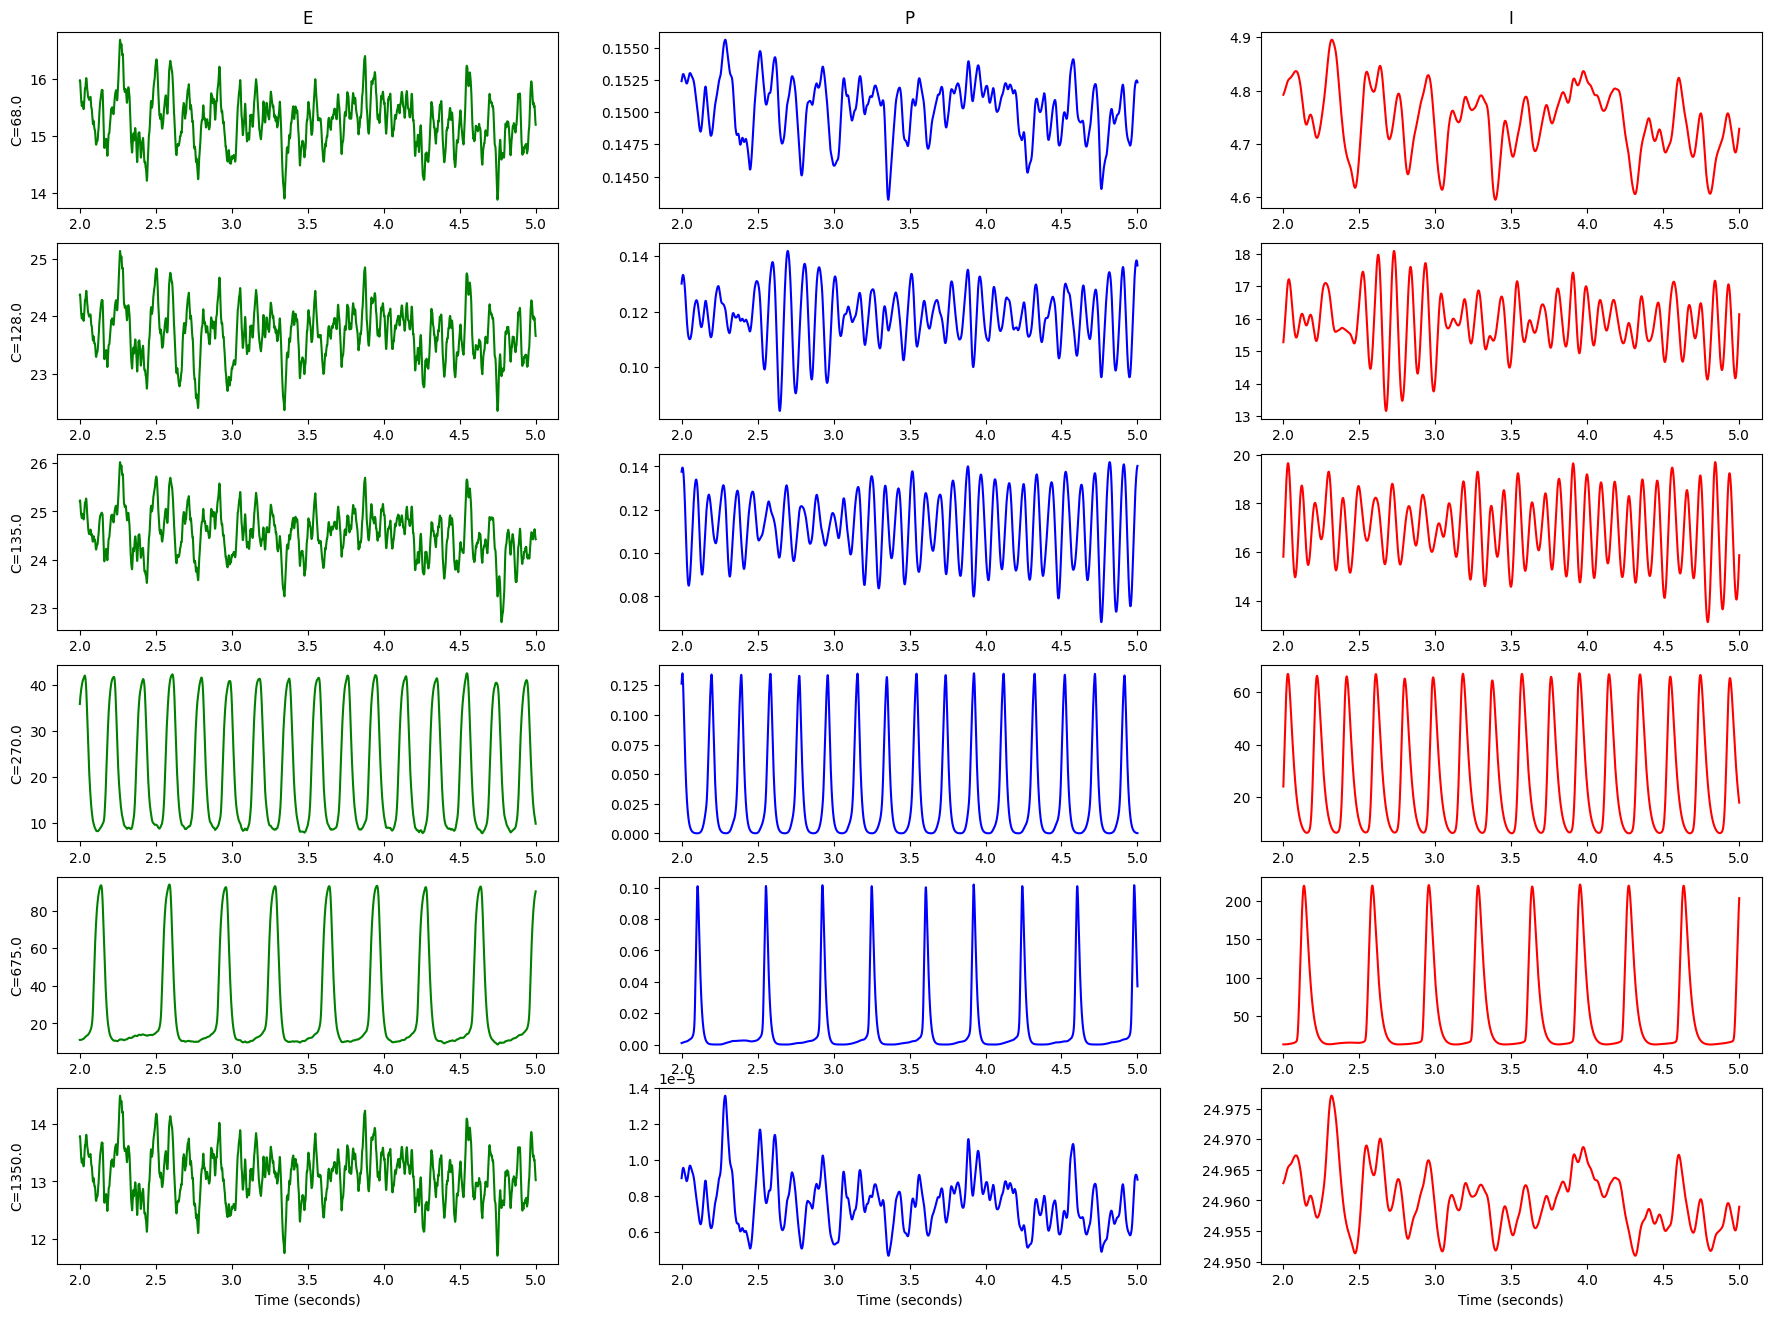

rk4
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 9s


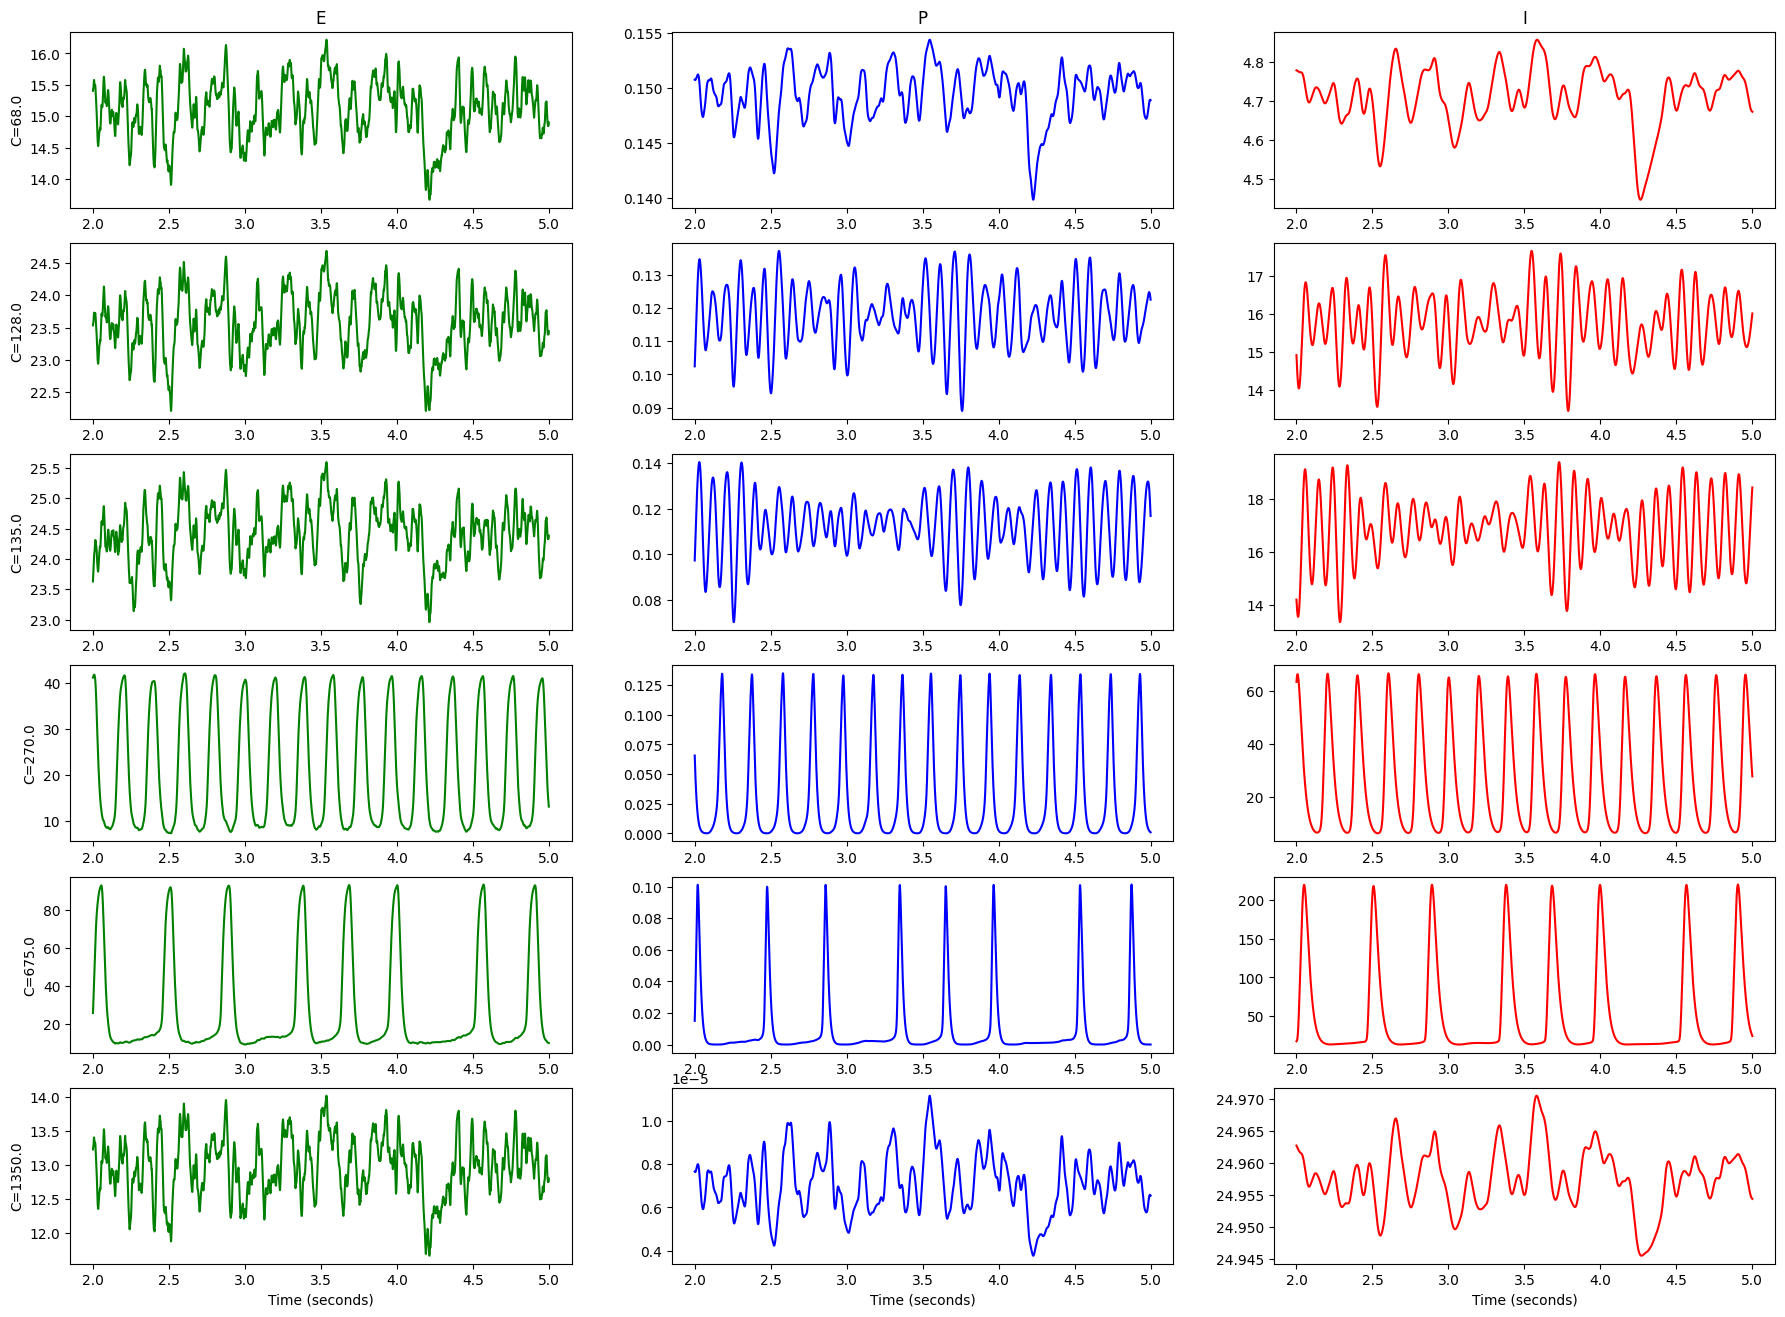

heun
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 8s


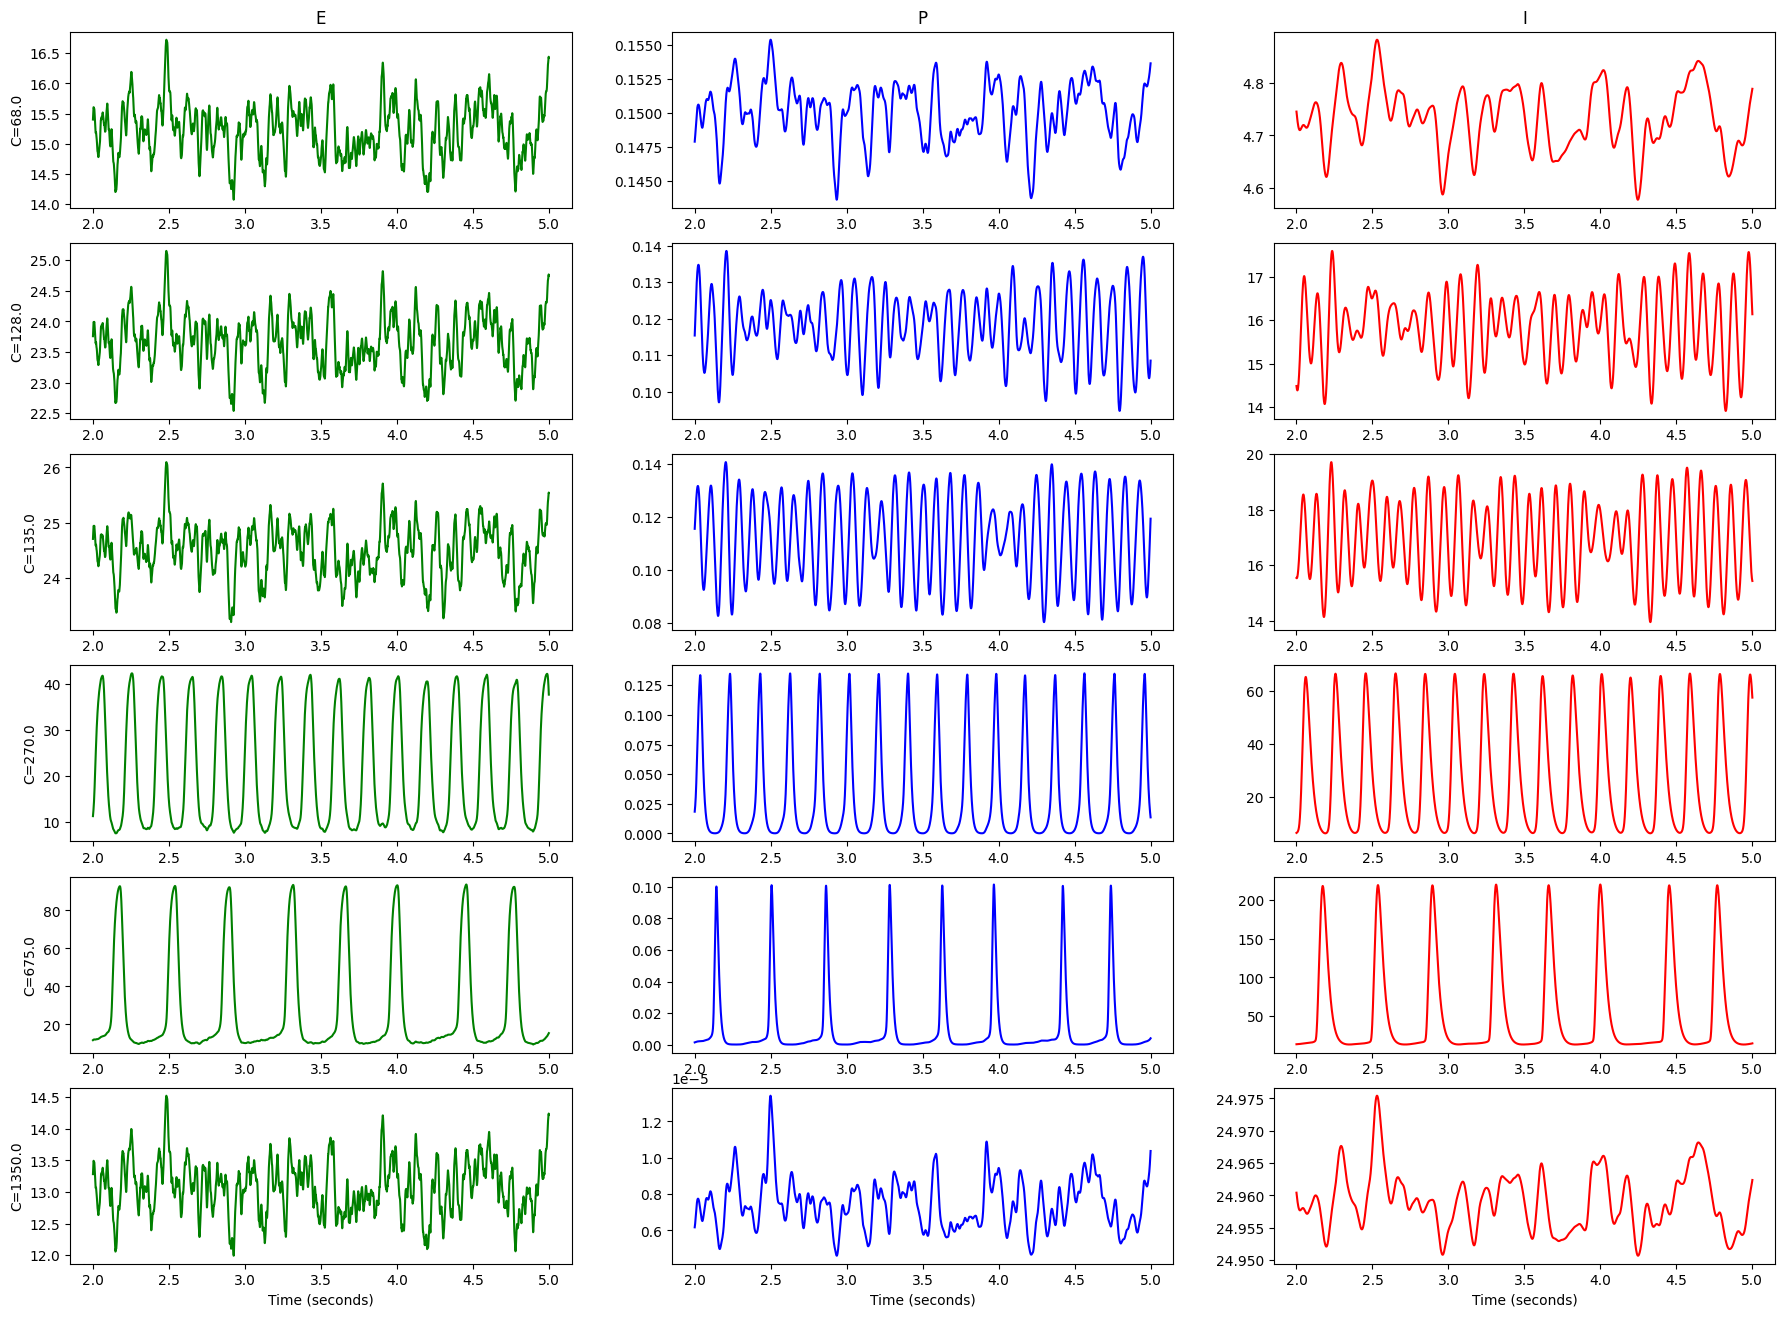

milstein
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 8s


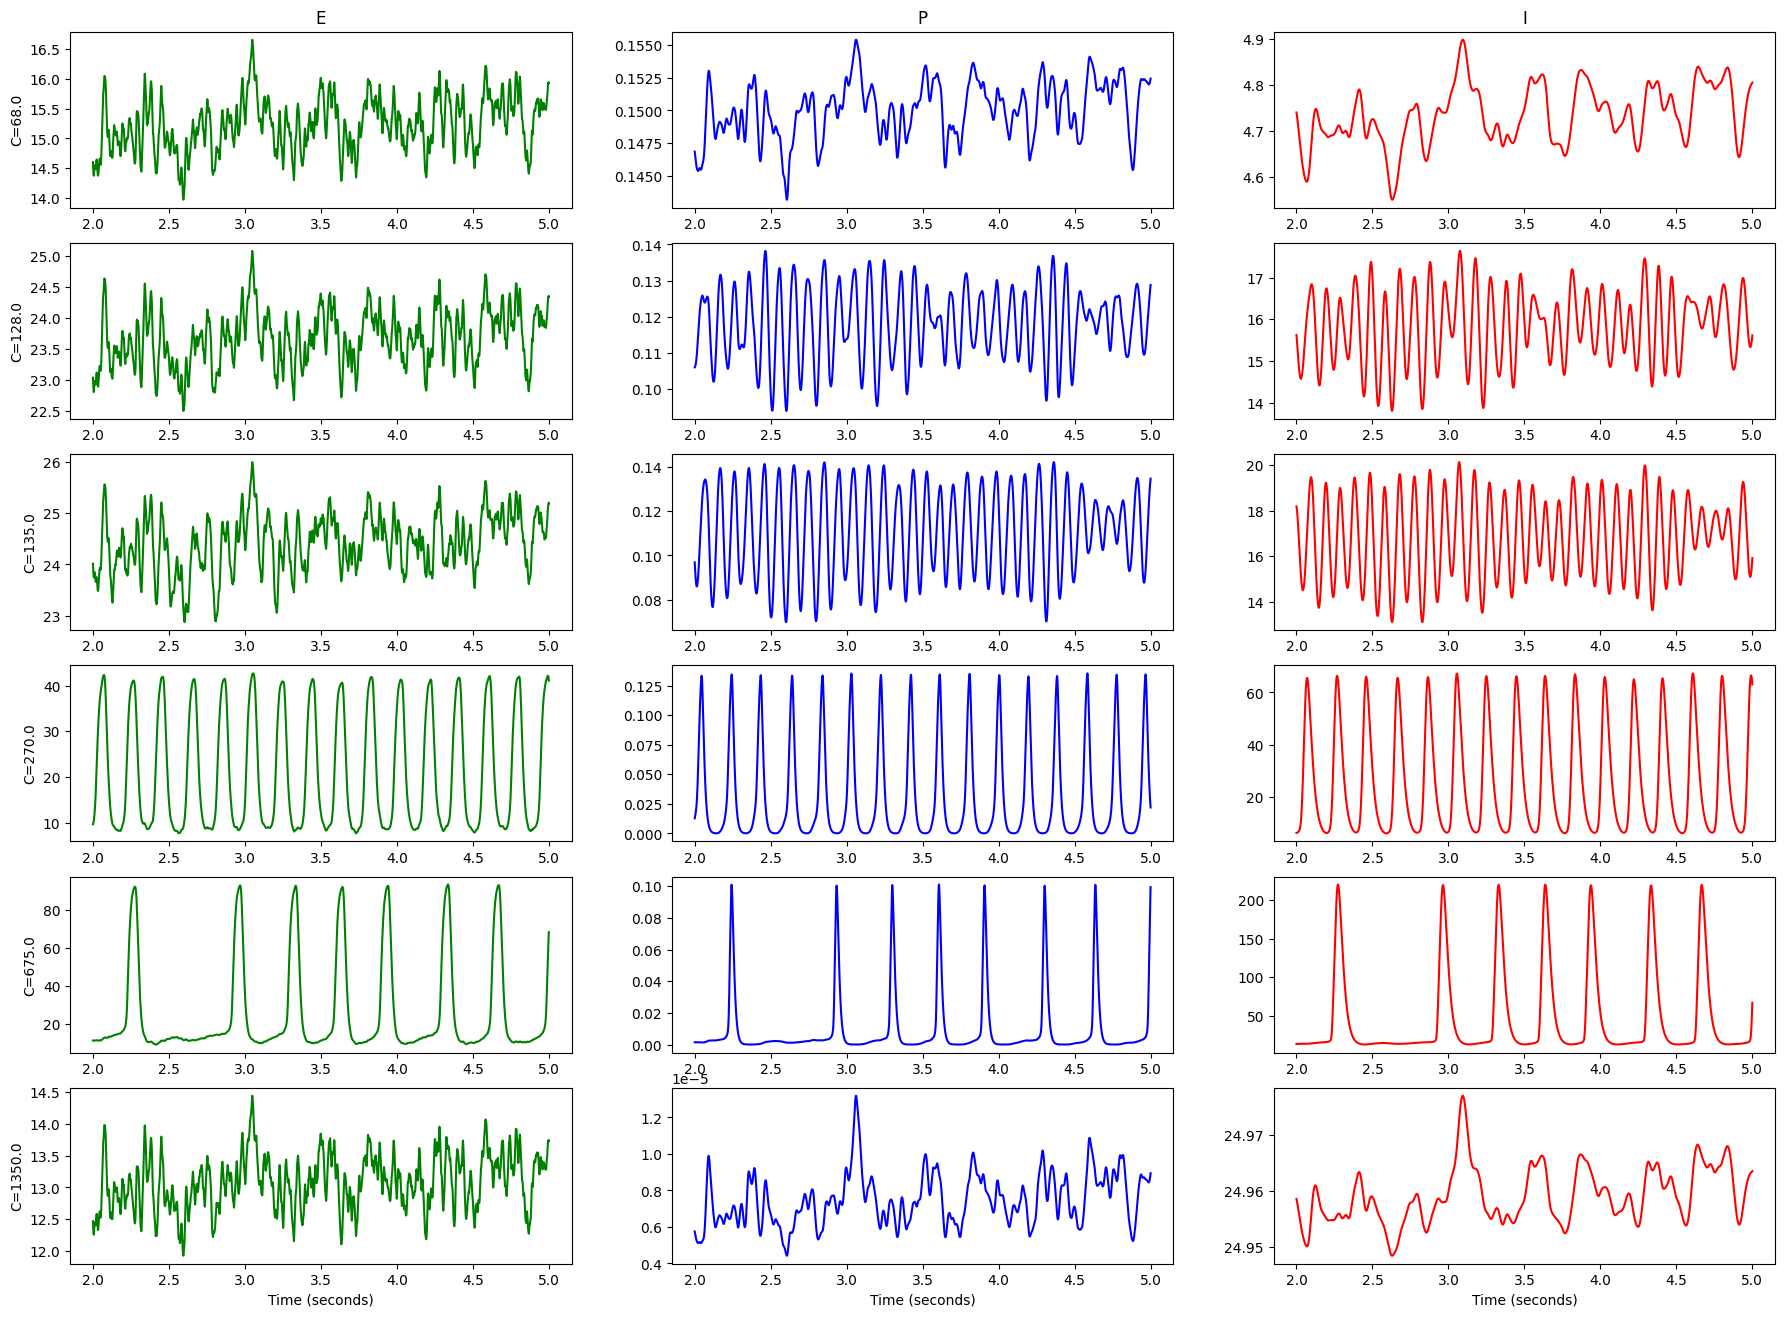

In [2]:
integrators=['exact', 'exponential_euler', 'euler', 'rk2', 'rk4', 'heun', 'milstein']
for integrator in integrators:
    print(integrator)
    JensenRit1995(integrator)